In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# Dataset and Output Paths
DATASET_DIR = r"C:\Users\radhi\AI Project\gtsrb-preprocessed\train"
OUTPUT_DIR = r"C:\Users\radhi\AI Project\gtsrb-processed"

# Ensure output directory exists
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Function to preprocess image
def preprocess_image(image_path, target_size=(32, 32)):
    """Read an image, resize it, and normalize pixel values."""
    img = cv2.imread(image_path)  # Read image
    
    if img is None:
        print(f"⚠️ Skipping invalid image: {image_path}")  # Debugging info
        return None  # Return None if the image is not valid
    
    img = cv2.resize(img, target_size)  # Resize to target size
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    img = img / 255.0  # Normalize pixel values (0 to 1)

    return img

# Process images class-wise
for class_id in tqdm(os.listdir(DATASET_DIR), desc="Processing Classes"):
    class_path = os.path.join(DATASET_DIR, class_id)
    
    if not os.path.isdir(class_path):
        continue  # Skip non-folder files

    output_class_path = os.path.join(OUTPUT_DIR, class_id)
    os.makedirs(output_class_path, exist_ok=True)  # Create output subfolder

    # Process each image inside the class folder
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        if not img_name.lower().endswith(('.png', '.jpg', '.jpeg')):  
            continue  # Skip non-image files

        processed_img = preprocess_image(img_path)  # Apply preprocessing
        
        if processed_img is None:
            continue  # Skip invalid images
        
        np.save(os.path.join(output_class_path, img_name.replace(".png", ".npy")), processed_img)  # Save as .npy

print("✅ Preprocessing Done! Processed data saved in:", OUTPUT_DIR)


Processing Classes: 100%|██████████████████████████████████████████████████████████████| 44/44 [00:42<00:00,  1.03it/s]

✅ Preprocessing Done! Processed data saved in: C:\Users\radhi\AI Project\gtsrb-processed


In [2]:
import os

OUTPUT_DIR = r"C:\Users\radhi\AI Project\gtsrb-processed"

# List the processed class folders
processed_classes = os.listdir(OUTPUT_DIR)
print("✅ Processed Classes:", processed_classes)


✅ Processed Classes: ['.ipynb_checkpoints', '0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9', 'german-traffic-signs-preprocessing.ipynb', 'test', 'train']


In [3]:
import os

preprocessed_dir = "../gtsrb-preprocessed"
train_dir = os.path.join(preprocessed_dir, "train")
test_dir = os.path.join(preprocessed_dir, "test")

print(f"Checking Path: {train_dir}")
print("Train Directory Exists:", os.path.exists(train_dir))
print("Test Directory Exists:", os.path.exists(test_dir))

print("\nAvailable classes in Train Dataset:", os.listdir(train_dir)[:5])  # Print first 5 class folders
print("Available images in Test Dataset:", os.listdir(test_dir)[:5])  # Print first 5 test images


Checking Path: ../gtsrb-preprocessed\train
Train Directory Exists: True
Test Directory Exists: True

Available classes in Train Dataset: ['.ipynb_checkpoints', '0', '1', '10', '11']
Available images in Test Dataset: ['00000.png', '00001.png', '00002.png', '00003.png', '00004.png']


In [4]:
import cv2
import numpy as np

IMG_SIZE = 48  # Resize images to 48x48

def load_images_from_folder(folder):
    images, labels = [], []
    
    for class_folder in sorted(os.listdir(folder)):  
        class_path = os.path.join(folder, class_folder)
        if not os.path.isdir(class_path):
            continue  

        img_list = os.listdir(class_path)[:5]  # Load first 5 images for preview
        print(f"Loading Class {class_folder}: {len(img_list)} images preview...")

        for image_name in img_list:
            img_path = os.path.join(class_path, image_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                images.append(img)
                labels.append(int(class_folder))

    print("\n✅ Image Loading Complete!")
    return np.array(images), np.array(labels)

X_train, y_train = load_images_from_folder(train_dir)
print("Total Images Loaded:", len(X_train))


Loading Class .ipynb_checkpoints: 0 images preview...
Loading Class 0: 5 images preview...
Loading Class 1: 5 images preview...
Loading Class 10: 5 images preview...
Loading Class 11: 5 images preview...
Loading Class 12: 5 images preview...
Loading Class 13: 5 images preview...
Loading Class 14: 5 images preview...
Loading Class 15: 5 images preview...
Loading Class 16: 5 images preview...
Loading Class 17: 5 images preview...
Loading Class 18: 5 images preview...
Loading Class 19: 5 images preview...
Loading Class 2: 5 images preview...
Loading Class 20: 5 images preview...
Loading Class 21: 5 images preview...
Loading Class 22: 5 images preview...
Loading Class 23: 5 images preview...
Loading Class 24: 5 images preview...
Loading Class 25: 5 images preview...
Loading Class 26: 5 images preview...
Loading Class 27: 5 images preview...
Loading Class 28: 5 images preview...
Loading Class 29: 5 images preview...
Loading Class 3: 5 images preview...
Loading Class 30: 5 images preview...


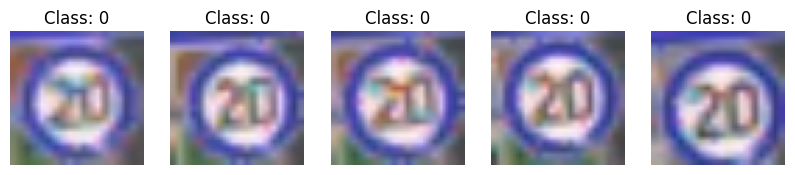

In [5]:
import matplotlib.pyplot as plt

def plot_sample_images(images, labels, num=5):
    plt.figure(figsize=(10, 4))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.imshow(images[i])
        plt.title(f"Class: {labels[i]}")
        plt.axis("off")
    plt.show()

plot_sample_images(X_train, y_train)


In [6]:
X_train = X_train.astype('float32') / 255.0  # Normalize images

print("\nDataset Shape After Normalization:")
print("X_train:", X_train.shape)



Dataset Shape After Normalization:
X_train: (215, 48, 48, 3)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

print("\n✅ Train-Validation Split Completed!")
print(f"Training Samples: {len(X_train)} | Validation Samples: {len(X_val)}")




✅ Train-Validation Split Completed!
Training Samples: 172 | Validation Samples: 43


In [8]:
np.save(os.path.join(preprocessed_dir, "X_train.npy"), X_train)
np.save(os.path.join(preprocessed_dir, "X_val.npy"), X_val)
np.save(os.path.join(preprocessed_dir, "y_train.npy"), y_train)
np.save(os.path.join(preprocessed_dir, "y_val.npy"), y_val)

print("\n✅ Preprocessed Data Saved Successfully!")
print("Saved Files:", os.listdir(preprocessed_dir))



✅ Preprocessed Data Saved Successfully!
Saved Files: ['.ipynb_checkpoints', 'test', 'train', 'X_train.npy', 'X_val.npy', 'y_train.npy', 'y_val.npy']


In [9]:
def load_images_from_folder(folder):
    images, labels = [], []
    
    for class_folder in sorted(os.listdir(folder)):  
        class_path = os.path.join(folder, class_folder)
        if not os.path.isdir(class_path):
            continue  

        img_list = os.listdir(class_path)[:5]  # Load first 5 images for preview
        print(f"Loading Class {class_folder}: {len(img_list)} images preview...")

        for image_name in img_list:
            img_path = os.path.join(class_path, image_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                images.append(img)
                labels.append(int(class_folder))  # 🔥 Ensure correct label is assigned

    print("\n✅ Image Loading Complete!")
    return np.array(images), np.array(labels)

X_train, y_train = load_images_from_folder(train_dir)


Loading Class .ipynb_checkpoints: 0 images preview...
Loading Class 0: 5 images preview...
Loading Class 1: 5 images preview...
Loading Class 10: 5 images preview...
Loading Class 11: 5 images preview...
Loading Class 12: 5 images preview...
Loading Class 13: 5 images preview...
Loading Class 14: 5 images preview...
Loading Class 15: 5 images preview...
Loading Class 16: 5 images preview...
Loading Class 17: 5 images preview...
Loading Class 18: 5 images preview...
Loading Class 19: 5 images preview...
Loading Class 2: 5 images preview...
Loading Class 20: 5 images preview...
Loading Class 21: 5 images preview...
Loading Class 22: 5 images preview...
Loading Class 23: 5 images preview...
Loading Class 24: 5 images preview...
Loading Class 25: 5 images preview...
Loading Class 26: 5 images preview...
Loading Class 27: 5 images preview...
Loading Class 28: 5 images preview...
Loading Class 29: 5 images preview...
Loading Class 3: 5 images preview...
Loading Class 30: 5 images preview...


In [10]:
print("Unique Labels in Training Data:", np.unique(y_train))


Unique Labels in Training Data: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


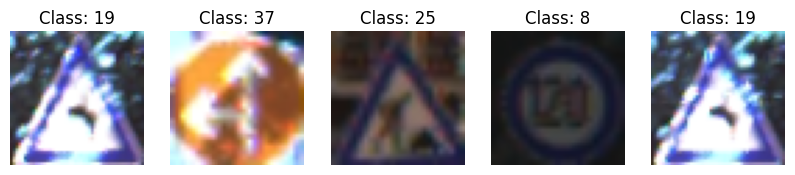

In [11]:
import random

def plot_sample_images(images, labels, num=5):
    plt.figure(figsize=(10, 4))
    indices = random.sample(range(len(images)), num)  # Pick random images
    for i, idx in enumerate(indices):
        plt.subplot(1, num, i+1)
        plt.imshow(images[idx])
        plt.title(f"Class: {labels[idx]}")
        plt.axis("off")
    plt.show()

plot_sample_images(X_train, y_train)


Checking Paths: ../gtsrb-preprocessed\train, ../gtsrb-preprocessed\test
Train Directory Exists: True
Test Directory Exists: True

Available Classes in Train Dataset: ['.ipynb_checkpoints', '0', '1', '10', '11']
Loading Class .ipynb_checkpoints: 0 images preview...
Loading Class 0: 5 images preview...
Loading Class 1: 5 images preview...
Loading Class 10: 5 images preview...
Loading Class 11: 5 images preview...
Loading Class 12: 5 images preview...
Loading Class 13: 5 images preview...
Loading Class 14: 5 images preview...
Loading Class 15: 5 images preview...
Loading Class 16: 5 images preview...
Loading Class 17: 5 images preview...
Loading Class 18: 5 images preview...
Loading Class 19: 5 images preview...
Loading Class 2: 5 images preview...
Loading Class 20: 5 images preview...
Loading Class 21: 5 images preview...
Loading Class 22: 5 images preview...
Loading Class 23: 5 images preview...
Loading Class 24: 5 images preview...
Loading Class 25: 5 images preview...
Loading Class 26

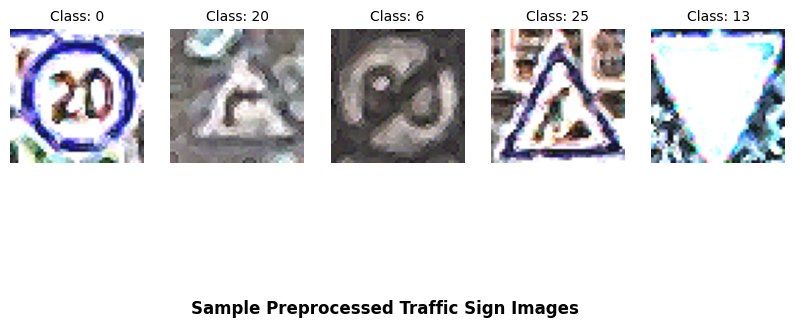


✅ Train-Validation Split Completed!
Training Samples: 172 | Validation Samples: 43

✅ Preprocessed Data Saved Successfully!
Saved Files: ['.ipynb_checkpoints', 'test', 'train', 'X_train.npy', 'X_val.npy', 'y_train.npy', 'y_val.npy']


In [23]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

# ✅ Define Paths
PREPROCESSED_DIR = "../gtsrb-preprocessed"
TRAIN_DIR = os.path.join(PREPROCESSED_DIR, "train")
TEST_DIR = os.path.join(PREPROCESSED_DIR, "test")

# ✅ Check Directories
print(f"Checking Paths: {TRAIN_DIR}, {TEST_DIR}")
print("Train Directory Exists:", os.path.exists(TRAIN_DIR))
print("Test Directory Exists:", os.path.exists(TEST_DIR))
print("\nAvailable Classes in Train Dataset:", os.listdir(TRAIN_DIR)[:5])  # Print first 5 class folders

# ✅ Image Processing Parameters
IMG_SIZE = 48  # Resize images to 48x48
def enhance_image(img):
    # Convert to LAB color space
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    
    # Apply Adaptive Histogram Equalization
    clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(8,8))
    l = clahe.apply(l)
    
    # Merge back and convert to BGR
    lab = cv2.merge((l, a, b))
    img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    
    # Apply Median Blur (Preserves Edges)
    img = cv2.medianBlur(img, 3)

    # 🔥 Apply Sharpening Kernel
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])  
    img = cv2.filter2D(img, -1, kernel)
    
    # Adjust Brightness & Contrast
    img = cv2.convertScaleAbs(img, alpha=1.5, beta=20)
    
    return img

# ✅ Update the Image Processing in Load Function
def load_images_from_folder(folder):
    images, labels = [], []
    
    for class_folder in sorted(os.listdir(folder)):  
        class_path = os.path.join(folder, class_folder)
        if not os.path.isdir(class_path):
            continue  

        img_list = os.listdir(class_path)[:5]  # Load first 5 images for preview
        print(f"Loading Class {class_folder}: {len(img_list)} images preview...")

        for image_name in img_list:
            img_path = os.path.join(class_path, image_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                
                # Apply the new enhancement function
                img = enhance_image(img)

                images.append(img)
                labels.append(int(class_folder))

    print("\n✅ Image Loading Complete!")
    return np.array(images), np.array(labels)



     

# ✅ Load Train Data
X_train, y_train = load_images_from_folder(TRAIN_DIR)
print("Total Images Loaded:", len(X_train))
print("Unique Labels in Training Data:", np.unique(y_train))

# ✅ Plot Sample Images
# ✅ Function to Plot Sample Images with a Heading
def plot_sample_images(images, labels, num=5):
    plt.figure(figsize=(10, 4))
    indices = random.sample(range(len(images)), num)  # Pick random images
    
    for i, idx in enumerate(indices):
        plt.subplot(1, num, i+1)
        plt.imshow(images[idx])
        plt.title(f"Class: {labels[idx]}", fontsize=10)
        plt.axis("off")
    
    # Add a heading below the images
    plt.figtext(0.5, -0.05, "Sample Preprocessed Traffic Sign Images", wrap=True, 
                horizontalalignment='center', fontsize=12, fontweight='bold')

    plt.show()

# ✅ Call Function to Display
plot_sample_images(X_train, y_train)  # Show Sample Images

# ✅ Normalize Images (0-1 range)
X_train = X_train.astype('float32') / 255.0  

# ✅ Train-Validation Split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

print("\n✅ Train-Validation Split Completed!")
print(f"Training Samples: {len(X_train)} | Validation Samples: {len(X_val)}")

# ✅ Save Preprocessed Data
np.save(os.path.join(PREPROCESSED_DIR, "X_train.npy"), X_train)
np.save(os.path.join(PREPROCESSED_DIR, "X_val.npy"), X_val)
np.save(os.path.join(PREPROCESSED_DIR, "y_train.npy"), y_train)
np.save(os.path.join(PREPROCESSED_DIR, "y_val.npy"), y_val)

print("\n✅ Preprocessed Data Saved Successfully!")
print("Saved Files:", os.listdir(PREPROCESSED_DIR))
